In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def complexity(f, a, b, log = False):
    if log: 
        log_fn = f
    else:
        log_fn = lambda n: np.log(np.abs(f(n)))
    max = round(log_fn(a)/np.log(a))
    for n in range(a+1, b+1):
        alpha = round(log_fn(n)/np.log(n))
        if alpha > max:
            max = alpha
        
    return max

In [3]:
def random_with_N_digits(n):

    range_start = 10**(n-1)
    range_end = (10**n)-1
    return random.randint(range_start, range_end)

In [4]:
def grade_school_multiply(A, B, N):
    assign = compare = 0
    A_str = str(A)
    B_str = str(B)
    result = 0
    assign += 3
    for i in range(N-1, -1, -1):
        value = 0
        for j in range(N-1, -1, -1):
            mul1 = str(int(B_str[i])*int(A_str[j])) + '0'*(N-1-j)
            value += int(mul1)
            assign += 2
            compare += 1

        mul2 = str(value) + '0'*(N-1-i)
        result += int(mul2)
        compare += 2
        assign += 3
    compare += 1
    return result, assign, compare

In [5]:
def karatsuba_multiply(A, B, N):
    assign = compare = 0
    def Karatsuba(X, Y, N):
        assign = compare = 0
        m = (N//2)
        A1 = X // (10 ** m)
        A2 = X % (10 ** m)
        B1 = Y // (10 ** m)
        B2 = Y % (10 ** m)
        assign += 5

        compare += 1
        if N == 1:
            return X*Y, assign, compare
        else:
            C, assign1, compare1 = Karatsuba(A1,B1, len(str(A1)))
            D, assign2, compare2 = Karatsuba(A2,B2, len(str(A2)))
            E3, assign3, compare3 = Karatsuba(A1+A2, B1+B2, len(str(A1+A2)))
            E = E3 - C - D
            result = (10**(m*2))*C + (10**m)*E + D
            assign += (5 + assign1 + assign2 + assign3)
            compare += (compare1 + compare2 + compare3)
            return result, assign, compare
    result, assign_k, compare_k = Karatsuba(A, B, N)
    assign += assign_k
    compare += compare_k
    return result, assign, compare

     Exercise 1
********************
>> For n in range [10, 1000] then
@ alpha for f(n) = n^2: 		 2
@ alpha for f(n) = n^3 + cos(n).n^4: 	 4
@ alpha for f(n) = n^n: 		 1000
@ alpha for f(n) = n^3 + n^2 + n + 1: 	 3
     Exercise 2
********************
Example
N =  8
A =  23927689
B =  65526575
>> Implement grade school multiplication:
A*B =  1567899507835175
>> Implement karatsuba multiplication:
A*B =  1567899507835175


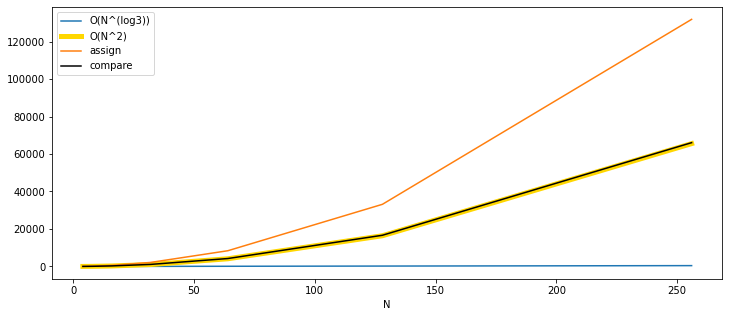

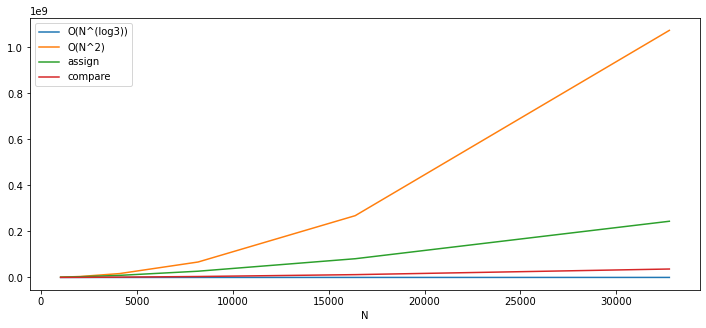

In [6]:
def main():
    ''' 
    ******************************************
    *               Exercise 1               *
    ******************************************
    '''
    print(" "*5+"Exercise 1")
    print("*"*20)
    f1 = lambda n: n**2
    f2 = lambda n: n**3 + np.cos(n)*(n**4)
    f3 = lambda n: n*np.log(n)
    f4 = lambda n: n**3 + n**2 + n + 1
    a = 10
    b = 1000
    print(">> For n in range [10, 1000] then")
    print('@ alpha for f(n) = n^2: \t\t',complexity(f1, a, b))
    print('@ alpha for f(n) = n^3 + cos(n).n^4: \t',complexity(f2, a, b))
    print('@ alpha for f(n) = n^n: \t\t',complexity(f3, a, b, log=True))
    print('@ alpha for f(n) = n^3 + n^2 + n + 1: \t',complexity(f4, a, b))

    ''' 
    ******************************************
    *               Exercise 2               *
    ******************************************
    '''
    print(" "*5+"Exercise 2")
    print("*"*20)
    # Example
    print("Example")
    n = 2**3
    A = random_with_N_digits(n)
    B = random_with_N_digits(n)
    print("N = ", n)
    print("A = ", A)
    print("B = ", B)


 
    ## Example
    # Grade School Multiplication
    
    print(">> Implement grade school multiplication:")
    AB, _, _ = grade_school_multiply(A, B, n)
    print("A*B = ", AB)
    
    # Karatsuba Multiplication
    print(">> Implement karatsuba multiplication:")
    AB1, _, _ = karatsuba_multiply(A,B, n)
    print("A*B = ", AB1)

    # Grade School Multiplication
    # Init list of A, B, N 
    N = [2**k for k in range(2,8+1)]
    AA = np.array([random_with_N_digits(n) for n in N])
    BB = np.array([random_with_N_digits(n) for n in N])
    # Show plot to compare with O(N^2)
    temp = np.array([grade_school_multiply(A, B, n) for (A, B, n) in zip(AA, BB, N)])
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(N, (N)**(np.log(3)))
    ax.plot(N, N**(np.int64(2)), linewidth=5, color='gold')
    ax.plot(N, temp[:,1])
    ax.plot(N, temp[:,2], color = 'k')
    ax.set(xlabel="N")
    ax.legend(["O(N^(log3))", "O(N^2)", "assign", "compare"])
    plt.savefig("grade_school.jpg")
    plt.show()
    
    
    ## Karatsuba Multiplication
    # Init list of A, B, N 
    N = [2**k for k in range(10,15+1)]
    AA = np.array([random_with_N_digits(n) for n in N])
    BB = np.array([random_with_N_digits(n) for n in N])
    # Show plot to compare with O(N^(log3))   
    temp = np.array([karatsuba_multiply(A, B, n) for (A, B, n) in zip(AA, BB, N)]) 
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(N, (N)**(np.log(3)))
    ax.plot(N, N**(np.int64(2)))
    ax.plot(N, temp[:,1])
    ax.plot(N, temp[:,2])
    ax.set(xlabel="N")
    ax.legend(["O(N^(log3))", "O(N^2)", "assign", "compare"])
    plt.savefig("karatsuba.jpg")
    plt.show()


if __name__ == '__main__':
    main()